#####price predictor


In [1]:
import pandas as pd
import yfinance as yf

# Facthing Historic data
stock_df  = yf.download('RELIANCE.NS',start = '2018-01-01',end = '2024-11-4')

# load dataset
stock_df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2018-01-01 00:00:00+00:00,394.054565,415.907104,421.827393,414.878479,421.827393,9453202
2018-01-02 00:00:00+00:00,394.660980,416.547119,420.387329,414.375580,417.392883,9499419
2018-01-03 00:00:00+00:00,396.241943,418.215790,423.336060,417.415741,422.878876,13507800
2018-01-04 00:00:00+00:00,398.624268,420.730194,421.415955,418.627228,419.747284,9008932
2018-01-05 00:00:00+00:00,399.902069,422.078827,423.747498,420.707336,421.415955,7441284


In [2]:
stock_df.shape

(1688, 6)

In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2018-01-01 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  1688 non-null   float64
 1   (Close, RELIANCE.NS)      1688 non-null   float64
 2   (High, RELIANCE.NS)       1688 non-null   float64
 3   (Low, RELIANCE.NS)        1688 non-null   float64
 4   (Open, RELIANCE.NS)       1688 non-null   float64
 5   (Volume, RELIANCE.NS)     1688 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 92.3 KB


In [4]:
stock_df.isnull().sum()

,,0
Price,Ticker,
Adj Close,RELIANCE.NS,0
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [5]:
stock_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1.688000e+03
mean,927.653405,943.575503,953.902635,933.988384,944.240192,1.932960e+07
std,331.652495,326.762311,329.084664,324.656986,326.889979,1.465995e+07
min,382.337982,403.540741,409.552490,398.191895,400.934906,1.705656e+06
25%,584.446930,607.859833,615.574509,601.830933,608.899887,1.078924e+07
50%,980.900360,998.362610,1012.299896,986.917419,1000.843170,1.498750e+07
75%,1170.459595,1182.471436,1195.688416,1173.516296,1183.192535,2.213798e+07
max,1595.484985,1600.900024,1608.800049,1585.500000,1604.449951,1.426834e+08


In [6]:
# making a copy
df = stock_df.copy()

In [7]:
# created nest_close
df['next_close'] = df['Close'].shift(-1)

In [8]:
# used dropna method
df.dropna(inplace = True)

In [9]:
#created column pre_close
df['pre_close'] = df['Close'].shift(1)
df['ma5'] = df['Close'].rolling(window = 5).mean()
df['Daily_return'] = df['Close'].pct_change()

df.dropna(inplace = True)


In [10]:
# time target valriable
X = df[['pre_close','ma5','Daily_return']]
y = df['next_close']

In [11]:
df

Price,Adj Close,Close,High,Low,Open,Volume,next_close,pre_close,ma5,Daily_return
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,
Date,,,,,,,,,,
2018-01-05 00:00:00+00:00,399.902069,422.078827,423.747498,420.707336,421.415955,7441284,424.501831,420.730194,418.695807,0.003205
2018-01-08 00:00:00+00:00,402.197754,424.501831,425.621887,422.193146,423.381775,8827020,430.170685,422.078827,420.414752,0.005741
2018-01-09 00:00:00+00:00,407.568695,430.170685,431.519318,422.421722,424.318939,14294571,430.810730,424.501831,423.139465,0.013354
2018-01-10 00:00:00+00:00,408.175140,430.810730,433.119415,427.679138,431.107880,11727682,428.707764,430.170685,425.658453,0.001488
2018-01-11 00:00:00+00:00,406.182678,428.707764,430.947876,427.450531,430.559265,7849171,433.850861,430.810730,427.253967,-0.004881
...,...,...,...,...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,1327.849976,1327.849976,1344.349976,1322.000000,1343.500000,18597496,1334.349976,1339.800049,1343.744995,-0.008919
2024-10-28 00:00:00+00:00,1334.349976,1334.349976,1353.000000,1322.099976,1337.000000,10824350,1340.000000,1327.849976,1336.775000,0.004895


In [12]:
from sklearn.model_selection import train_test_split

X_trian,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print(f"Training sample {len(X_trian)}",f"Testing sample{len(X_test)}")


Training sample 1346 Testing sample337


In [13]:
# tain a regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_trian,y_train)
y_predict = model.predict(X_test)

print(f'mean squared error{mean_squared_error(y_test,y_predict)}')
print(f'r2_score{r2_score(y_test,y_predict)}')

mean squared error341.04540585315834
r2_score0.9966657818459842


In [14]:
y_train_predict = model.predict(X_trian)
print(f"mean squared error{mean_squared_error(y_train,y_train_predict)}")
print(f"r2_score{r2_score(y_train,y_train_predict)}")

mean squared error278.7306647629583
r2_score0.9973946222357419


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle =False )

# Train the model
model.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)


Train MSE: 270.9353400996869
Test MSE: 374.8413658606511
Train R2: 0.9963710281440222
Test R2: 0.9779298407658185


In [16]:
# Get yesterday's data for prediction
latest_features = df[['pre_close', 'ma5', 'Daily_return']].iloc[-1:]


# Predict today's price
predicted_price = model.predict(latest_features)
print(f"Predicted Price for Today: {predicted_price[0]}")


Predicted Price for Today: 1336.675446020684


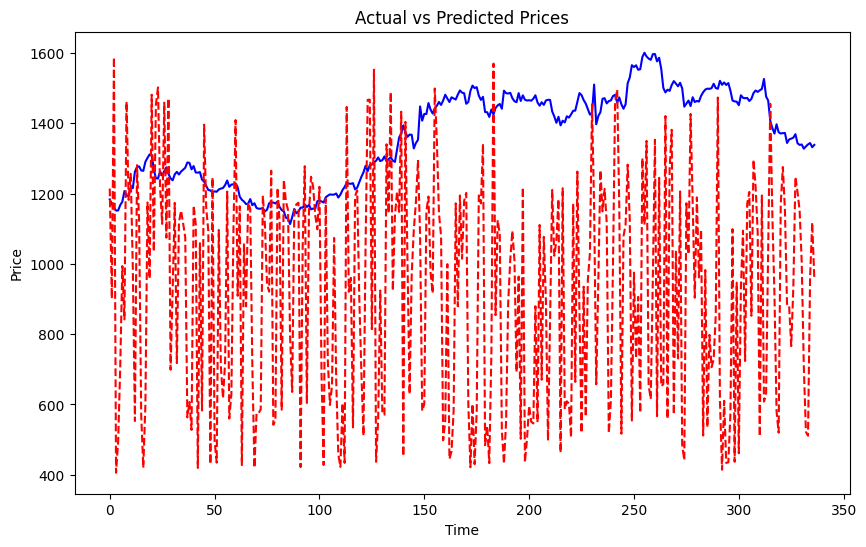

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(y_test.values,color = 'Blue')
plt.plot(y_predict,color = 'red',linestyle = '--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()